In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import functools
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import ElasticNetCV
import seaborn as sns

In [180]:
np.random.seed(42)
X = np.random.normal(size=(10, 1000))
noise = np.random.normal(size=1000)
b0, b1, b2, b3 = 15 * np.random.uniform(size=4)
X1, X2, X3 = X[0], X[1], X[2]
Y = b0 + b1 * X1 + b2 * X2 + b3 * X3 + noise

In [181]:
def Cp_score(sigma2 , estimator , X, Y):
    #Negative Cp statistic
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

In [182]:
y_pred = LinearRegression().fit(X.T,Y).predict(X.T)
residual = y_pred - Y
sigma2 = residual.var()

In [183]:
Cp = functools.partial(Cp_score, sigma2)
ols = LinearRegression()
forward = SequentialFeatureSelector(ols, scoring=Cp)

In [184]:
forward.fit(X.T, Y)
features_selected = X[forward.get_support()]

In [185]:
model = LinearRegression().fit(features_selected.T, Y)

In [186]:
model.coef_

array([14.69985836,  9.24015559,  2.72165988, -0.02776749, -0.02631497])

In [187]:
df = pd.DataFrame(X.T)
df['y'] = Y
sigmas = []
for _ in range(100):
    samples = resample(df)
    y_pred = LinearRegression().fit(samples.drop('y', axis=1),samples['y']).predict(samples.drop('y', axis=1))
    residual = y_pred - samples['y']
    sigmas.append(residual.var())

In [188]:
backward = SequentialFeatureSelector(LinearRegression(), direction='backward', scoring=Cp)
backward.fit(X.T, Y)
backward_selected = X[backward.get_support()]
model = LinearRegression().fit(backward_selected.T, Y)
model.coef_

array([14.69985836,  9.24015559,  2.72165988, -0.02776749, -0.02631497])

In [189]:
### LASSO

In [190]:
lasso = ElasticNetCV(l1_ratio=1, cv=10)

In [191]:
lasso.fit(X.T,Y)

ElasticNetCV(cv=10, l1_ratio=1)

In [192]:
alphas = lasso.alphas_
mse_mean = [np.mean(mse) for mse in lasso.mse_path_]

<Axes: >

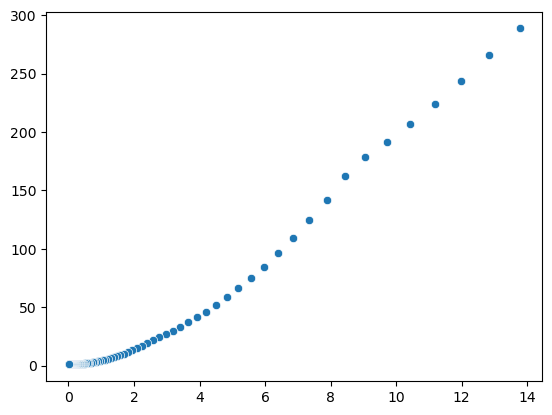

In [193]:
sns.scatterplot(x=alphas, y=mse_mean)

In [194]:
lasso.coef_

array([ 1.46712366e+01,  9.21024881e+00,  2.69678872e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.01298020e-02, -1.27743497e-03,
        8.53912494e-03, -0.00000000e+00])

In [196]:
X7 = X[6]
b7 = 15 * np.random.uniform()
Y_2 = b0 + b7 * X7 + noise

In [197]:
lasso = ElasticNetCV(l1_ratio=1)
lasso.fit(X.T,Y_2)
alphas = lasso.alphas_
mse_mean = [np.mean(mse) for mse in lasso.mse_path_]

<Axes: >

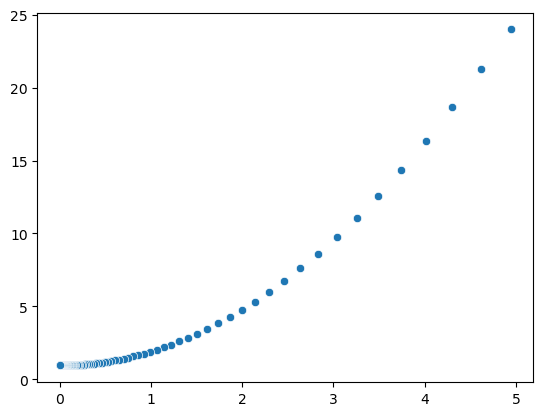

In [198]:
sns.scatterplot(x=alphas, y=mse_mean)

In [199]:
lasso.alpha_, lasso.coef_, lasso.l1_ratio_

(np.float64(0.04010942057577816),
 array([-0.        , -0.        , -0.        ,  0.        , -0.        ,
        -0.        ,  4.67306036, -0.        ,  0.        , -0.        ]),
 np.int64(1))

In [200]:
forward = SequentialFeatureSelector(LinearRegression(), scoring=Cp)
forward.fit(X.T, Y_2)
forward_selected = X[forward.get_support()]
model = LinearRegression().fit(forward_selected.T, Y_2)
forward.get_support(), model.coef_

(array([ True, False,  True, False, False, False,  True,  True, False,
         True]),
 array([-3.22281310e-03, -2.88923125e-02,  4.71030767e+00, -2.79101828e-02,
        -2.65449461e-02]))